config
periods
config
periods


C:\Users\Eduardo\AppData\Local\Temp\ipykernel_25880\2650433468.py:53: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Fechas'] = pd.to_datetime(df['Fechas'], errors='coerce')


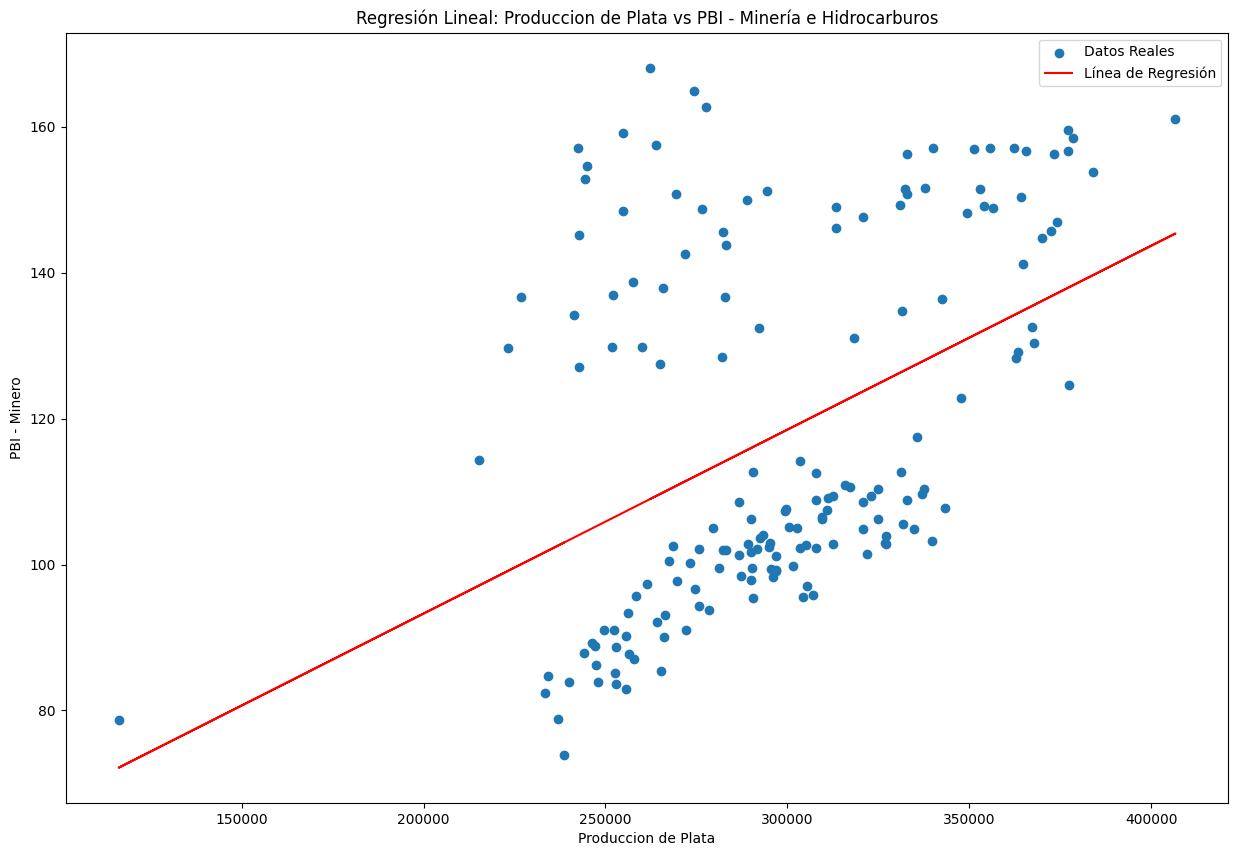

In [3]:
import pandas as pd
import requests
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Descargar los datos
url_path = "https://estadisticas.bcrp.gob.pe/estadisticas/series/api/"
serie_produccion_cobre = "RD12996DM"
serie_pbi_mineria = "PN01760AM"
formato = "/json"
per = "/2003-1-1/2023-12-31"

# Construir las URLs
url_produccion = url_path + serie_produccion_cobre + formato + per
url_pbi_mineria = url_path + serie_pbi_mineria + formato + per

# Obtener los datos
response_produccion = requests.get(url_produccion)
response_pbi_mineria = requests.get(url_pbi_mineria)
response_json_produccion = response_produccion.json()
response_json_pbi = response_pbi_mineria.json()

for key in response_json_produccion.keys():
    print(key)
for keyy in response_json_pbi.keys():
    print(keyy)

periodos_produccion = response_json_produccion.get('periods', [])
produccion_index = []
for b in periodos_produccion:
    valoress = b.get('values', [])
    for x in valoress:
        if x != 'n.d.':
            produccion_index.append(float(x))
        else:
            produccion_index.append(None)  # Reemplazar con None (NaN en Pandas)

periodos_pbi = response_json_pbi.get('periods', [])
pbi_index = []
for b in periodos_pbi:
    valoress = b.get('values', [])
    for x in valoress:
        if x != 'n.d.':
            pbi_index.append(float(x))
        else:
            pbi_index.append(None)  # Reemplazar con None (NaN en Pandas)

fechas = [q['name'] for q in periodos_produccion]

glosario = {"Fechas": fechas, "Produccion": produccion_index, "PBI": pbi_index}
df=pd.DataFrame(glosario)
# Asegurarse de que 'Fechas' es de tipo datetime y los valores son numéricos
df['Fechas'] = pd.to_datetime(df['Fechas'], errors='coerce')
df['Produccion'] = pd.to_numeric(df['Produccion'], errors='coerce')
df['PBI'] = pd.to_numeric(df['PBI'], errors='coerce')
# Eliminar filas con NaN
df = df.dropna(subset=['Fechas', 'Produccion', 'PBI'])
# Modelo de Regresión Lineal
X = df[['Produccion']]
y = df['PBI']
X = sm.add_constant(X)  # Añadir una constante al modelo
modelo = sm.OLS(y, X).fit()

# Predicciones
predicciones = modelo.predict(X)

plt.figure(figsize=(15, 10))
plt.scatter(df['Produccion'], df['PBI'], label='Datos Reales')
plt.plot(df['Produccion'], predicciones, color='red', label='Línea de Regresión')
plt.xlabel('Produccion de Plata')
plt.ylabel('PBI - Minero')
plt.title('Regresión Lineal: Produccion de Plata vs PBI - Minería e Hidrocarburos')
plt.legend()
plt.show()